In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv("/content/sample_data/exam_data.csv")

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [40]:
df.shape

(1000, 8)

In [41]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [42]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

**Changing datatype and removing non numeric values**

In [43]:
df["math score"].unique()

df['math score'] = df['math score'].replace('?', np.nan)
df['math score'] = df['math score'].astype('float64')

In [44]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [45]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

**Replace null values with mean, median and mode**

In [46]:
df["math score"] = df["math score"].replace(np.nan, df["math score"].mean());

In [47]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [48]:
df["reading score"] = df["reading score"].fillna(df["reading score"].median(skipna=True))

In [49]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  9
dtype: int64

In [50]:
df["writing score"] = df["writing score"].fillna(df["writing score"].mean(skipna=True))

<Axes: >

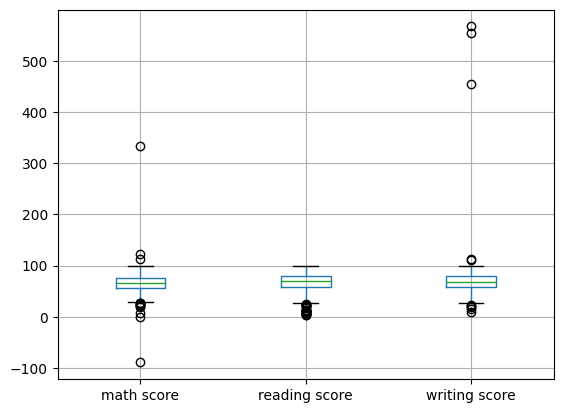

In [51]:
df.boxplot()

**Removing** **Outliers** **Manually**

<Axes: >

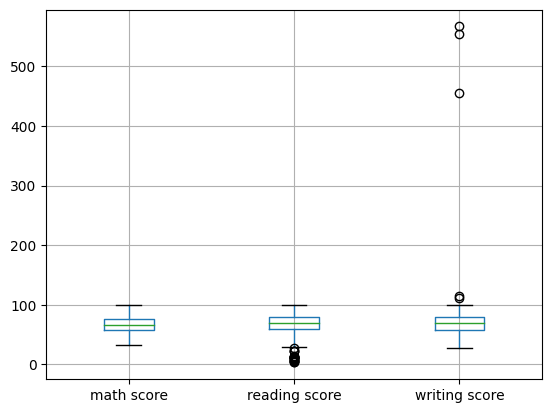

In [54]:
lower = df["math score"] > 30
upper = df["math score"] < 100
df = df[(lower) & (upper)]
df.boxplot()

In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


**Remving Outliers by using Z-Score**

In [56]:
def trim(col : pd.core.series.Series) :
  upperLimit = col.mean() + 3 * col.std()
  lowerLimit = col.mean() - 3 * col.std()
  newCol = col[ (col < upperLimit) & (col > lowerLimit) ]
  return newCol

<Axes: xlabel='reading score'>

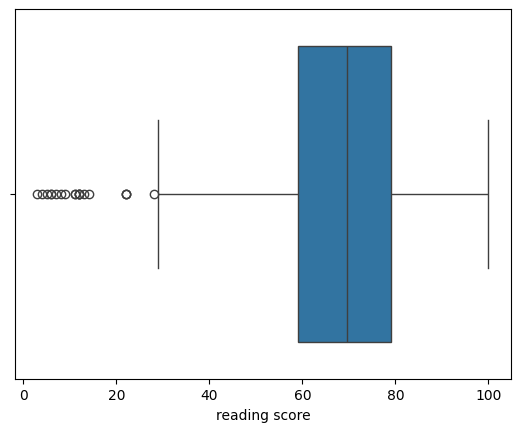

In [57]:
sns.boxplot(data = df, x = df['reading score'])

In [58]:
readingCol = trim(df["reading score"])

<Axes: xlabel='reading score'>

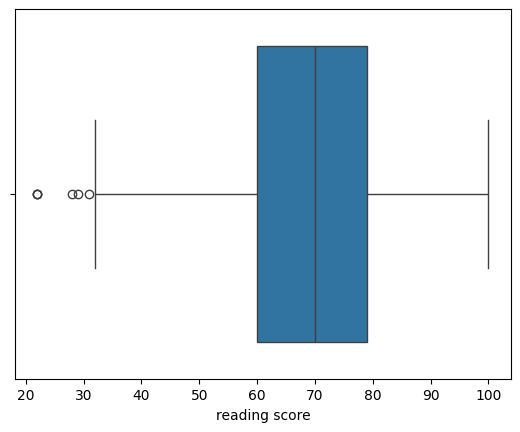

In [59]:
sns.boxplot(data = df, x = readingCol)

**Removing outliers using IOR Method**

In [62]:
def iqr(col : pd.core.series.Series) :
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lowerLimit = Q1 - 1.5 * IQR
  upperLimit = Q3 + 1.5 * IQR

  newCol = col[ (col < upperLimit) & (col > lowerLimit) ]
  return newCol

<Axes: xlabel='writing score'>

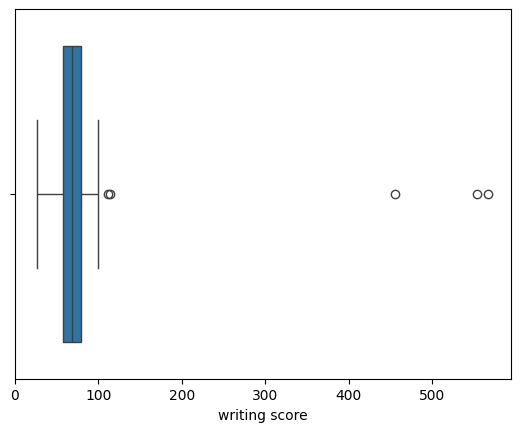

In [63]:
sns.boxplot(data = df, x = df['writing score'])

In [64]:
writingCol = iqr(df["writing score"])

<Axes: xlabel='writing score'>

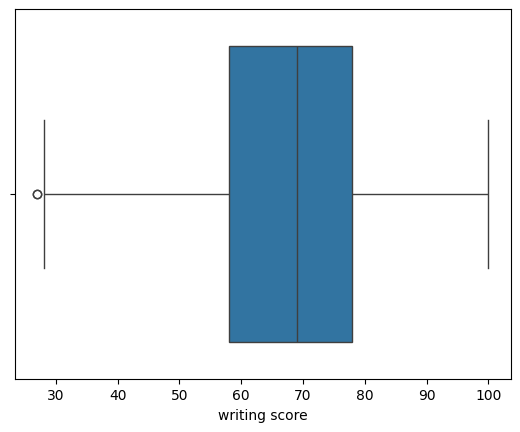

In [65]:
sns.boxplot(data = df, x = writingCol)

In [66]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

**Min-Max Normalization**

In [67]:
df["reading score"] = (df["reading score"] - df["reading score"].min()) / (df["reading score"].max() - df["reading score"].min())

<ipython-input-67-fd2085436bfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reading score"] = (df["reading score"] - df["reading score"].min()) / (df["reading score"].max() - df["reading score"].min())


In [69]:
df["reading score"]

0      0.711340
1      0.896907
2      0.948454
3      0.556701
4      0.773196
         ...   
995    0.989691
996    0.536082
997    0.701031
998    0.773196
999    0.855670
Name: reading score, Length: 974, dtype: float64

**Z-Score Normalization**

In [71]:
df["writing score"] = (df["writing score"] - df["writing score"].mean()) / (df["writing score"].std())
df["writing score"]

<ipython-input-71-6660f5ac5113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["writing score"] = (df["writing score"] - df["writing score"].mean()) / (df["writing score"].std())


0      0.142121
1      0.620558
2      0.791429
3     -0.883102
4      0.176295
         ...   
995    0.859777
996   -0.507187
997   -0.165446
998    0.244643
999    0.552210
Name: writing score, Length: 974, dtype: float64